In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jobs-in-data/jobs_in_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/jobs-in-data/jobs_in_data.csv')
data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


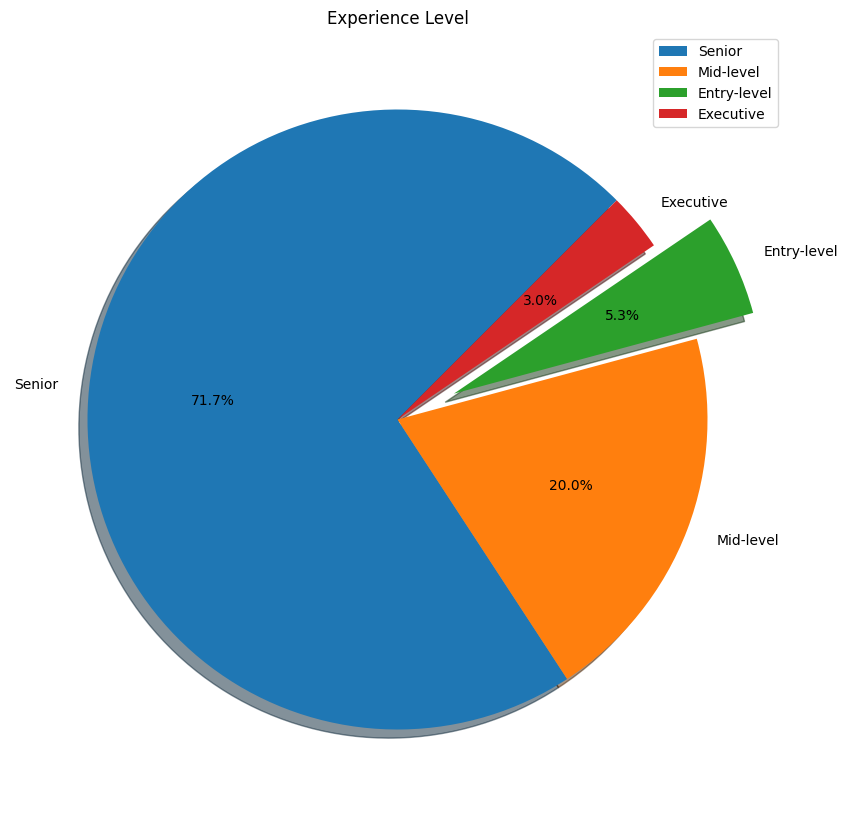

In [3]:
plt.figure(figsize = (10,16))
labels = data["experience_level"].value_counts().index
sizes = data["experience_level"].value_counts()
myexplode = [0,0,0.2,0]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=45,explode=myexplode, shadow=True)
plt.title('Experience Level')
plt.legend()
plt.show()

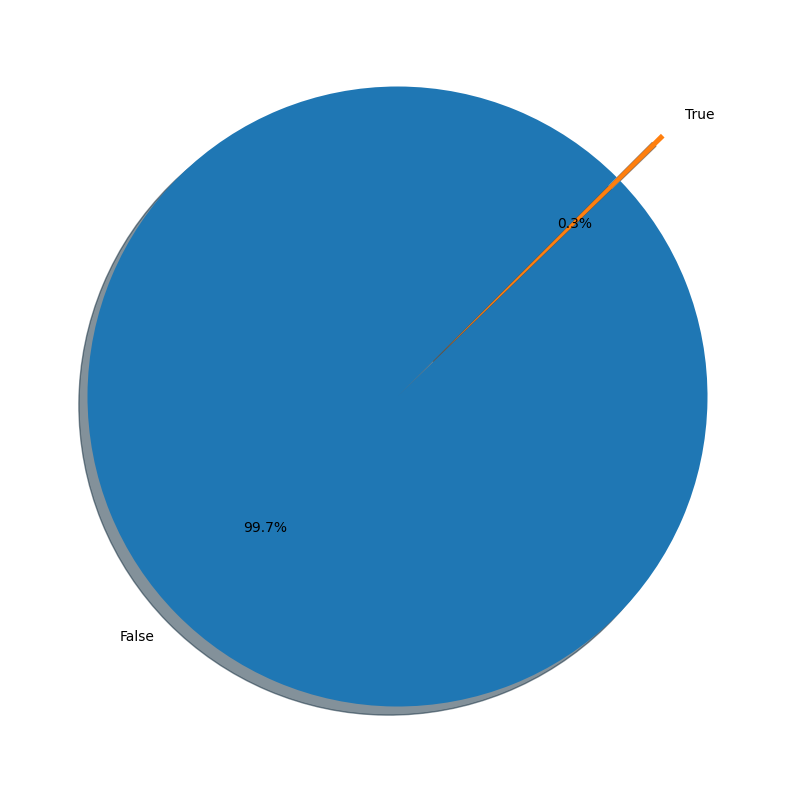

In [4]:
data['Relocation'] = np.where((data['company_location']!=data['employee_residence'])& (data['work_setting']!='Remote'), True, False)
plt.figure(figsize = (10,16))
labels = data["Relocation"].value_counts().index
sizes = data["Relocation"].value_counts()
myexplode = [0,0.2]
plt.pie(sizes, labels=labels,autopct='%1.1f%%', startangle=45,explode=myexplode, shadow=True)
plt.show()

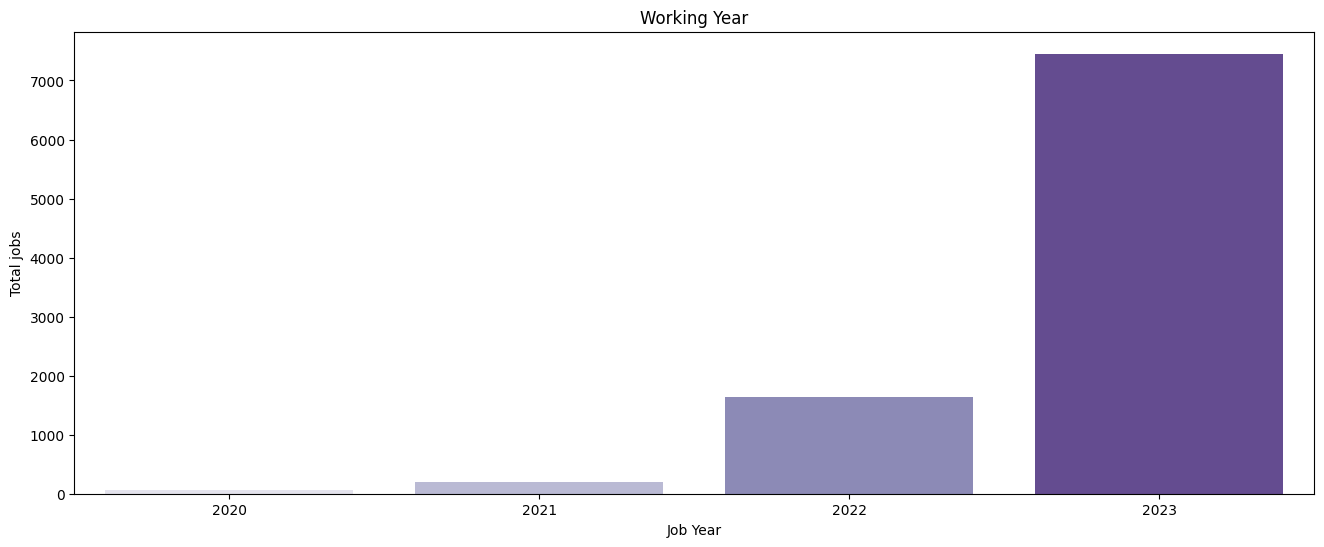

In [5]:
plt.figure(figsize=(16,6))
sns.countplot(data=data,x="work_year",palette='Purples')
plt.xlabel("Job Year")
plt.ylabel("Total jobs")
plt.title("Working Year")
plt.show()

In [6]:
data['work_year'] = data['work_year'].astype(str)
data_total_income = data.groupby('work_year',as_index=False)['salary_in_usd'].sum()
px.line(data_total_income, x="work_year", y="salary_in_usd", title='<b> Year wise Total Income')


In [7]:
data_top_10 = data.groupby('job_title',as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd',ascending=False).head(10)
px.bar(data_top_10, x='job_title', y='salary_in_usd',template='seaborn', title = '<b> Top 10 Highest Paid Roles in Data Science')

In [8]:
data_top_10 = data.groupby('job_title',as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd',ascending=False).head(10)
px.bar(data_top_10, x='job_title', y='salary_in_usd',template='seaborn', title = '<b> Top 10 Roles in Data Science by Average Pay')

In [9]:
data_work_setting = data.groupby('work_setting',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False)
fig=px.pie(data_work_setting,names='work_setting',values='salary_in_usd',color='work_setting',hole=0.5,labels={'remote_ratio':'work_setting','salary_in_usd':'count'},template='seaborn',title='<b> Remote Ratio')
fig.update_layout(title_x=0.5)

In [10]:
data_countries_15 = data.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(15)
px.funnel(data_countries_15,y='company_location',x='experience_level',labels={'experience_level':'count'},template='seaborn',title='<b> Top 15 Countries having maximum Data Science Jobs')